In [1]:
from quantileRegression import quantileRegression
import pandas as pd
import numpy as np

Welcome to ROOTaaS 6.06/02


In [2]:
# Variable you want to correct
ylist = ["R9"] #, "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR"]

# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list

In [3]:
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]
print "Number of quantiles ", len(quantiles)

Number of quantiles  9


In [4]:
# Initialize the quantile regression object for mc
qr_mc = quantileRegression("mc")

In [5]:
# This is what you want to correct
print "Load the mc dataframe"
startEvtmc = 2000001 
stopEvtmc  = 3000000 
qr_mc.loadDF("/Users/mauro/CMS/Physics/dataMC/nt/double_ele_spring16v2_sync_v1_mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYToEE_powheg_13TeV_EBHighR9", "DYToEE_powheg_13TeV_EBLowR9", "DYToEE_powheg_13TeV_EEHighR9", "DYToEE_powheg_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, 12345)

Load the mc dataframe
NT branches: 
['rho', 'nvtx', 'leadPt', 'leadScEta', 'leadPhi', 'leadR9', 'leadS4', 'leadSigmaIeIe', 'leadEtaWidth', 'leadPhiWidth', 'leadCovarianceIphiIphi', 'leadSigmaRR', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadR9', 'subleadS4', 'subleadSigmaIeIe', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadCovarianceIphiIphi', 'subleadSigmaRR']
Reading trees
Number of events  
rho                          2393830
nvtx                         2393830
leadPt                       2393830
leadScEta                    2393830
leadPhi                      2393830
leadR9                       2393830
leadS4                       2393830
leadSigmaIeIe                2393830
leadEtaWidth                 2393830
leadPhiWidth                 2393830
leadCovarianceIphiIphi       2393830
leadSigmaRR                  2393830
subleadPt                    2393830
subleadScEta                 2393830
subleadPhi                   2393830
subleadR9                    2393830
suble

In [6]:
print "Get the corrected data-mc values"
# qr_mc.correctY(X, y, quantiles )
qr_mc.correctAllY(X, ylist, quantiles )

Get the corrected data-mc values
Loading corrected targets from :  correctedTargets.h5


In [7]:
#y_mc   = qr_mc.getY(y)
#y_mccorr = qr_mc.getCorrectedY(y)
#print y_mc
#print y_mccorr
dfmc = qr_mc.getDF()

In [8]:
# Plot data, mc, mc_corrr
# just need to load the data for plotting 
qr_data = quantileRegression("data")
startEvtdata = 0
stopEvtdata   = -1
print "Load the data dataframe"
qr_data.loadDF("/Users/mauro/CMS/Physics/dataMC/nt/double_ele_spring16v2_sync_v1_ichep/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata)

Load the data dataframe
NT branches: 
['rho', 'nvtx', 'leadHLT_Ele27_WPTight_Gsf_vMatch', 'subleadHLT_Ele27_WPTight_Gsf_vMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadR9', 'leadS4', 'leadSigmaIeIe', 'leadEtaWidth', 'leadPhiWidth', 'leadCovarianceIphiIphi', 'leadSigmaRR', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadR9', 'subleadS4', 'subleadSigmaIeIe', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadCovarianceIphiIphi', 'subleadSigmaRR']
Reading trees
Number of events  
rho                                    1037409
nvtx                                   1037409
leadHLT_Ele27_WPTight_Gsf_vMatch       1037409
subleadHLT_Ele27_WPTight_Gsf_vMatch    1037409
leadPt                                 1037409
leadScEta                              1037409
leadPhi                                1037409
leadR9                                 1037409
leadS4                                 1037409
leadSigmaIeIe                          1037409
leadEtaWidth                           1037409
lea

In [9]:
#y_data   = qr_data.getY(y)
dfdata = qr_data.getDF()

In [10]:
# Some basic plots
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [11]:
# Diagnostic plots  --> scatter plot super heavy !
#plotQ = qr_mc.plotQuantilesR9(quantiles)
# Pt, ScEta, Phi, rho
# plotQpt  = qr_mc.plotQuantiles(quantiles, 'Pt',    10, 20, 60,      'R9', '$pt$',  'R$_9$', "./meanR9_pt.pdf")
# plotQpt.plot()
# plotQeta = qr_mc.plotQuantiles(quantiles, 'ScEta', 10, -2.5, 2.5,   'R9', '$eta$', 'R$_9$', "./meanR9_eta.pdf")
# plotQeta.plot()
# plotQphi = qr_mc.plotQuantiles(quantiles, 'Phi',   10, -3.14, 3.14, 'R9', '$phi$', 'R$_9$', "./meanR9_phi.pdf")
# plotQphi.plot()
# plotQrho = qr_mc.plotQuantiles(quantiles, 'rho',   10, 0, 50,       'R9', '$rho$', 'R$_9$', "./meanR9_rho.pdf")
# plotQrho.plot()

In [12]:
# fig = plt.figure()
# ax1 = fig.add_subplot(2, 2, 1)
# h_mc     = y_mc    .hist(bins=100, alpha = 1, color='g')
# ax2 = fig.add_subplot(2, 2, 2)
# h_mccorr = y_mccorr.hist(bins=100, alpha = 1, color='b')
# ax3 = fig.add_subplot(2, 2, 3)
# h_data   = y_data  .hist(bins=100, alpha = 1, color='r')
# print "mc    ", y_mc.count()
# print "data  ", y_data.count()
# print "mccorr", y_mccorr.count()

In [13]:
# fig2 = plt.figure()
# h_data    = y_data  .hist(bins=100, alpha = 1.0, color='r', normed = 1)
# h_mc      = y_mc    .hist(bins=100, alpha = 0.5, color='g', normed = 1)
# h_mccorr2 = y_mccorr.hist(bins=100, alpha = 0.5, color='b', normed = 1)
# fig2.savefig("test.pdf")

['R9']
plotting  R9


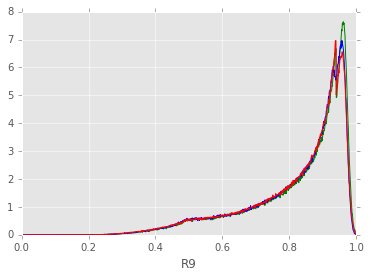

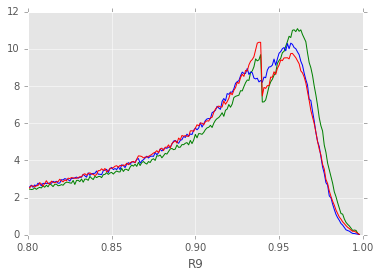

In [14]:
print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar

    rv = []
    if yvar == "R9":
        rv  = np.arange(0.0,1.0,0.001)
        rv2 = np.arange(0.8,1.0,0.001)
    if yvar == "S4":
        rv  = np.arange(0.0,1.0,0.001)
        rv2 = np.arange(0.8,1.0,0.001)
    if yvar == "SigmaIeIe":
        rv = np.arange(0.0,0.04,0.0001)
        rv2 = np.arange(0.015,0.030,0.0001)
    if yvar == "EtaWidth":
        rv = np.arange(0.0,0.05,0.0001)
        rv2 = np.arange(0.005,0.025,0.0001)
    if yvar == "PhiWidth":
        rv = np.arange(0.0,0.2,0.001)
        rv2 = np.arange(0.0,0.05,0.0003)
    if yvar == "CovarianceIphiIphi":
        rv  = np.arange(0.0, 0.02,0.0001)
        rv2 = np.arange(0.02, 0.05,0.0003)
    if yvar == "SigmaRR":
        rv = np.arange(1, 12.0,0.1) 
        rv2 = np.arange(1, 12.0,0.1)
     
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    mc_bins, _edges = np.histogram(dfmc[yvar], rv, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mc_bins,"g")
    mccorr_bins, _edges = np.histogram(dfmc[yvarcorr], rv, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mccorr_bins,"b")
    data_bins, _edges = np.histogram(dfdata[yvar], rv, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges  ,data_bins,"r")

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    mc_bins, _edges = np.histogram(dfmc[yvar], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mc_bins,"g")
    mccorr_bins, _edges = np.histogram(dfmc[yvarcorr], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mccorr_bins,"b")
    data_bins, _edges = np.histogram(dfdata[yvar], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges  ,data_bins,"r")

    
    
# mc_bins, _edges = np.histogram(y_mc, rv, normed = 1)
# edges = _edges[:len(_edges)-1]
# plt.plot(edges,mc_bins,"g")
# mccorr_bins, _edges = np.histogram(y_mccorr, rv, normed = 1)
# edges = _edges[:len(_edges)-1]
# plt.plot(edges,mccorr_bins,"b")
# data_bins, _edges = np.histogram(y_data, rv, normed = 1)b

# edges = _edges[:len(_edges)-1]
# plt.plot(edges  ,data_bins,"r")